In [6]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 33.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3736a0e67e728fd565e31c73658a8c06ac12332c584e747a53a72884f83aa8d2
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from mglearn.datasets import make_wave
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import mglearn.plots as plots
import matplotlib.pyplot as plt
import numpy as np

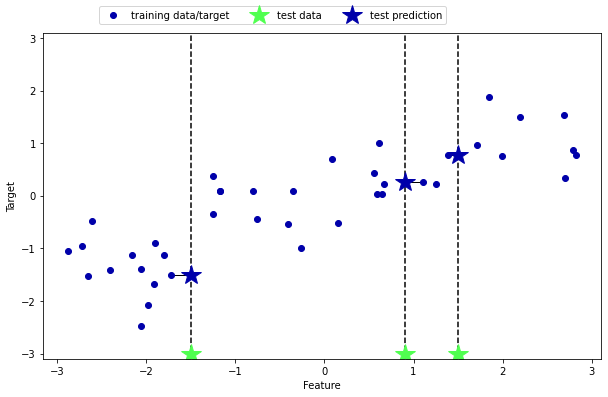

In [8]:
plots.plot_knn_regression(n_neighbors=1)

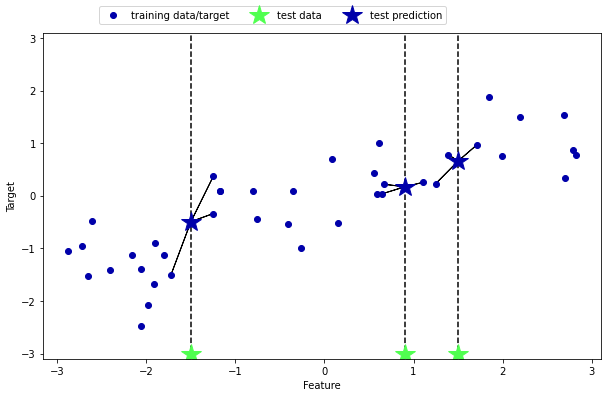

In [11]:
plots.plot_knn_regression(n_neighbors=3)

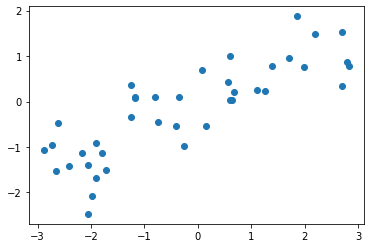

In [12]:
#subject6
X, y = make_wave(n_samples=40) 
plt.scatter(X, y)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knnr = KNeighborsRegressor(n_neighbors=1)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

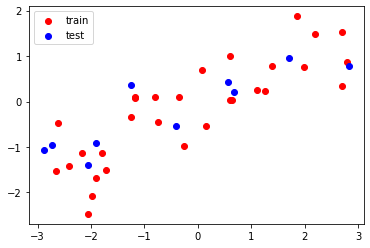

In [15]:
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, y_train, c='r', marker='o', label="train")
plt.scatter(X_test, y_test, c='b', marker='o', label="test")
plt.legend()
plt.show()

In [16]:
print(f"train score: {knnr.score(X_train, y_train)}")
print(f"test score: {knnr.score(X_test, y_test)}")

train score: 1.0
test score: 0.3519867415115093


In [17]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)
param = {
    "n_neighbors": list(range(1, 11, 1))
}

gridcv = GridSearchCV(knnr, param_grid=param, n_jobs=-1, cv=cv)
gridcv.fit(X_train, y_train)
print(f"score: {gridcv.best_params_}")

score: {'n_neighbors': 3}


In [23]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train, y_train)
print(f"optimized train score:{knnr.score(X_train, y_train)}")
print(f"optimized test score:{knnr.score(X_test, y_test)}")

optimized train score:0.8194343929538755
optimized test score:0.8344172446249605


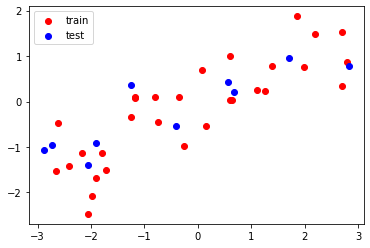

In [25]:
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, y_train, c='r', marker='o', label="train")
plt.scatter(X_test, y_test, c='b', marker='o', label="test")
plt.legend()
plt.show()

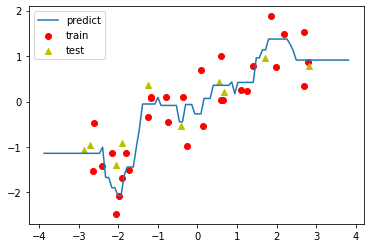

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train, y_train)
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
t_x = np.linspace(x_min, x_max, 100).reshape(-1, 1)
t_y = knnr.predict(t_x) 
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, y_train, c='r', marker='o', label="train")
plt.scatter(X_test, y_test, c='y', marker='^', label="test")
plt.plot(t_x, t_y, label="predict")
plt.legend()
plt.show()

In [10]:
import numpy as np
x = np.array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 100])
print(x.sum()/ x.shape[0])

#一枚引いて、引いたカードに書いてある数を自分の点数とする
e = 1 * (1 / x.shape[0]) + 2 * (2 / x.shape[0]) + 3 * (3 / x.shape[0]) + 4 * (4 / x.shape[0]) + 5 * (5 / x.shape[0]) + 100 * (1/x.shape[0])
print(e)

9.6875
9.6875
